In [1]:
import seaborn as sns
import json
import matplotlib.pyplot as plt
import pandas as pd


In [2]:

total_json_path = '/opt/ml/input/car/annotations/total_pretty.json'

with open(total_json_path, 'r') as f:
    data = json.load(f)
    

In [3]:
print(data.keys())
print(len(data['images']))

dict_keys(['info', 'images', 'categories', 'annotations'])
13313


### class별 분포

In [4]:
_class = dict()     # {'ambulance': 0, 'fire truck': 0, 'ladder truck': 0}
for i in data['categories']:
    _class[i['name']] = 0
    
# 1 -> ambulance
# 2 -> fire truck
# 3 -> ladder truck
num_class = [0,0,0]

for i in data['annotations']:
    id = i['category_id']
    num_class[id-1] += 1

print(num_class)  
print(sum(num_class))
  
for k,v in zip(_class.keys(), num_class):
    _class[k] = v

print(_class)


[5149, 5249, 2915]
13313
{'ambulance': 5149, 'fire truck': 5249, 'ladder truck': 2915}


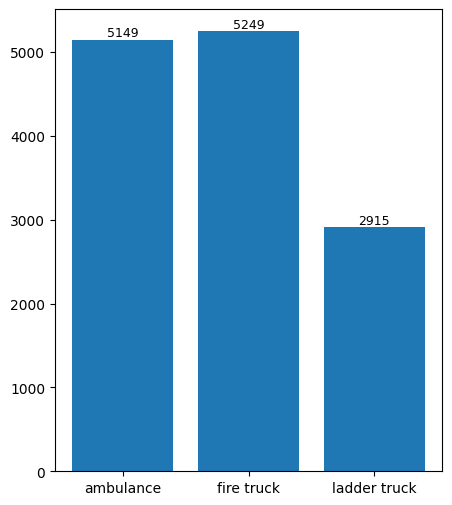

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(5, 6))
axes = plt.bar(_class.keys(), _class.values())

keys = list(_class.keys())
values = list(_class.values())

for i, v in enumerate(keys):
    plt.text(v,values[i],values[i],
             fontsize=9,
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.show()

### csv 형식으로 만들기

In [6]:
_data = pd.DataFrame(columns=['image_id','category_id','area', 'xmin', 'ymin', 'width', 'height'])

category = dict()
for i in data['categories']:
    category[i['id']] = i['name']
    
#print(_data)
#print(category)

for index, v in enumerate(data['annotations']):
    #print(index, v)
    image_id = v['image_id']
    category_id = v['category_id']
    area = v['area']
    bbox = v['bbox']
    xmin = bbox[0]
    ymin = bbox[1]
    width = bbox[2]
    height = bbox[3]
    
    _data.loc[index] = [image_id, category[category_id], area, xmin, ymin, width, height]
    
_data['file_name'] = ''

files = []
for i, v in enumerate(data['images']):
    file_name = v['file_name']
    files.append(file_name)
        
_data['file_name'] = files


In [7]:
print(_data.head())

  image_id   category_id           area xmin ymin width height  \
0        1  ladder truck  385385.615841  720  143   674    571   
1        2  ladder truck  422272.258073  928   20   543    777   
2        3  ladder truck  634804.530258  527  100   892    711   
3        4  ladder truck  271170.000000  728   84   393    690   
4        5  ladder truck  605952.000000  561  266  1152    526   

                            file_name  
0  P_211210_P_03_M12_06_01_S_0029.jpg  
1  P_211210_P_03_M12_08_01_S_0130.jpg  
2  P_211210_P_03_M12_07_02_S_0081.jpg  
3  P_211210_P_03_M12_03_01_S_0094.jpg  
4  P_211210_P_03_M12_05_01_S_0166.jpg  


### Box Plot


        중간의 사각형은 25%, medium, 50% 값을 의미

- **IQR(Interquartile range)** : 25th to the 75th percentile. 
- **whisker** : 박스 외부의 범위를 나타내는 선
- **outlier** : -IQR*1.5과 +IQR*1.5을 벗어나는 값

- min : -IQR * 1.5 보다 크거나 같은 값들 중 최솟값
- max : +IQR * 1.5 보다 작거나 같은 값들 중 최댓값

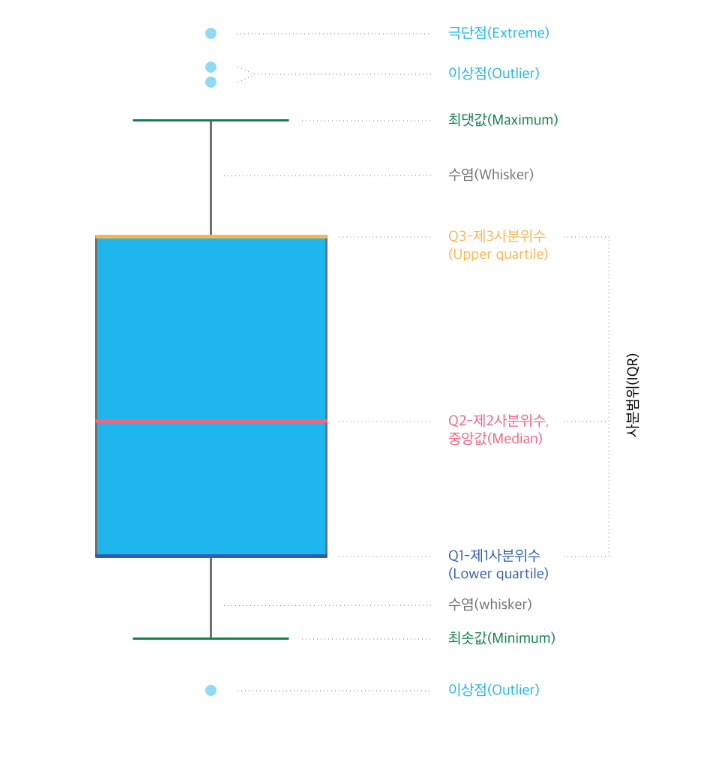
        

               area
count  1.331300e+04
mean   4.685172e+05
std    2.390183e+05
min    9.720000e+03
25%    2.950446e+05
50%    4.407921e+05
75%    6.062143e+05
max    1.830680e+06


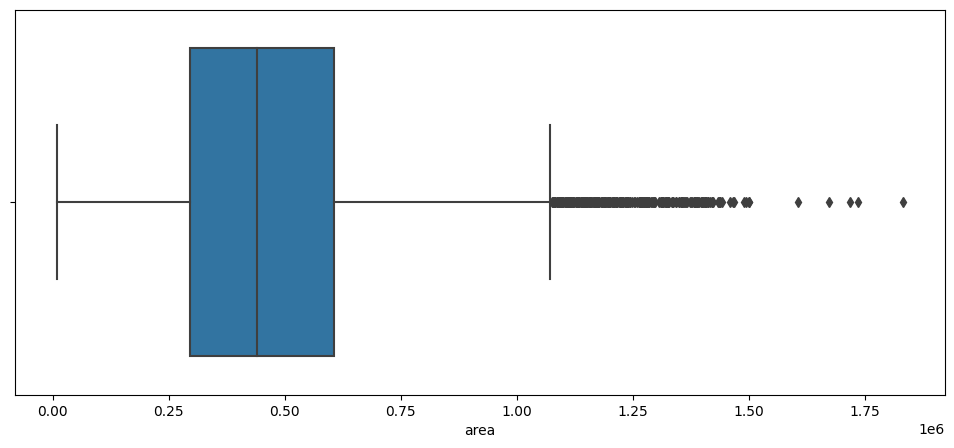

In [8]:
print(_data.describe())

fig, ax = plt.subplots(1,1, figsize=(12, 5))
sns.boxplot(x='area', data=_data, ax=ax)
plt.show()


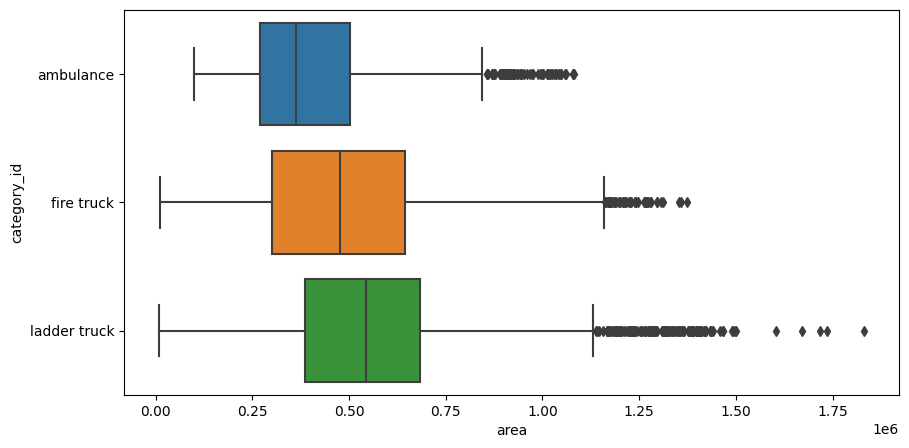

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(x='area', y='category_id', data=_data, 
            order=sorted(_data['category_id'].unique()),
            ax=ax)
plt.show()

1. area가 0.00 근처인 점들은 뭐지?
2. 분포로 보면 outlier 점들이 많이 발견됨.
3. area는 bbox의 넓이인데 -> outlier는 의미가 없나?


### Distribution

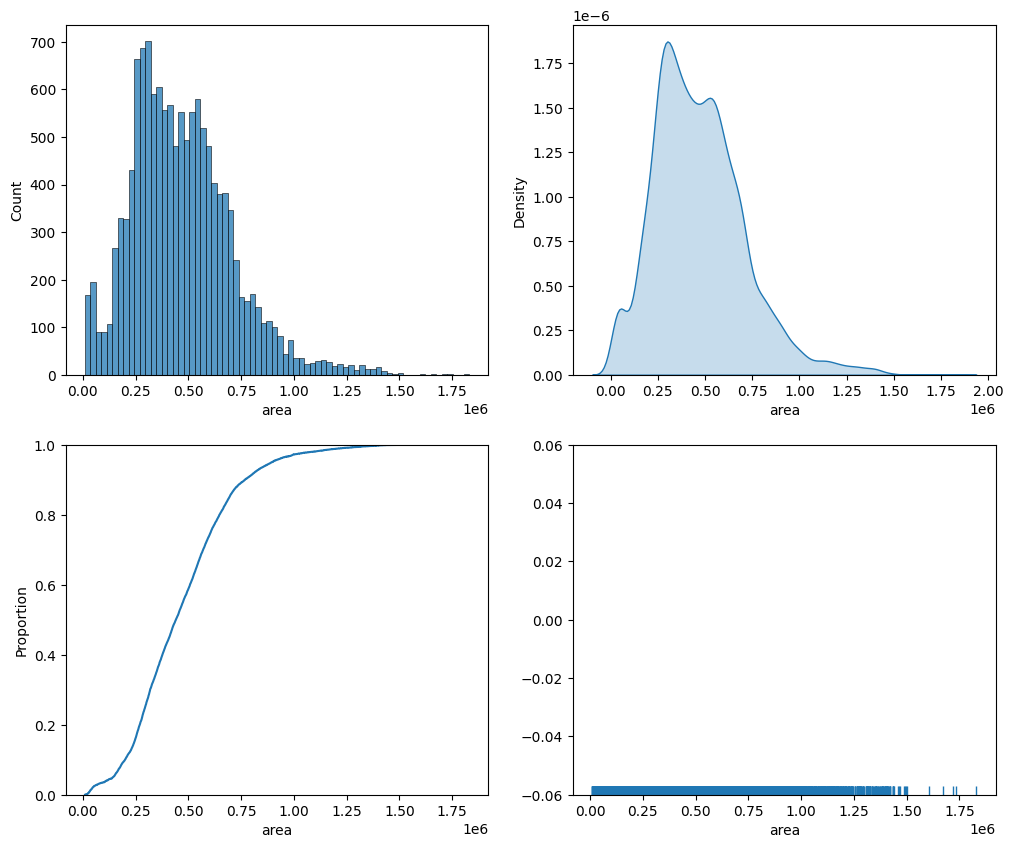

In [23]:
fig, axes = plt.subplots(2,2, figsize=(12, 10))
axes = axes.flatten()

sns.histplot(x='area', data=_data, ax=axes[0]) #, element='poly')

sns.kdeplot(x='area', data=_data, ax=axes[1], fill=True)

sns.ecdfplot(x='area', data=_data, ax=axes[2])

sns.rugplot(x='area', data=_data, ax=axes[3])


plt.show()

### histogram의 연속적 표현

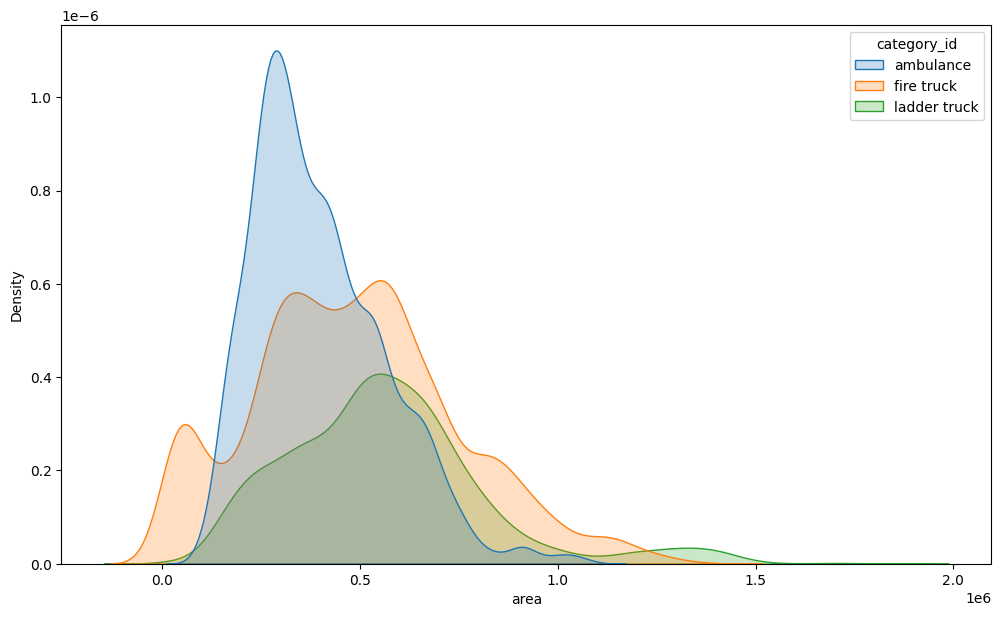

In [21]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='area', data=_data, ax=ax,
            fill=True, 
            hue='category_id', 
            hue_order=sorted(_data['category_id'].unique()))
plt.show()

In [36]:
print(_data.head())

print(_data.corr())

  image_id   category_id           area xmin ymin width height  \
0        1  ladder truck  385385.615841  720  143   674    571   
1        2  ladder truck  422272.258073  928   20   543    777   
2        3  ladder truck  634804.530258  527  100   892    711   
3        4  ladder truck  271170.000000  728   84   393    690   
4        5  ladder truck  605952.000000  561  266  1152    526   

                            file_name  
0  P_211210_P_03_M12_06_01_S_0029.jpg  
1  P_211210_P_03_M12_08_01_S_0130.jpg  
2  P_211210_P_03_M12_07_02_S_0081.jpg  
3  P_211210_P_03_M12_03_01_S_0094.jpg  
4  P_211210_P_03_M12_05_01_S_0166.jpg  
      area
area   1.0
